PROJECT 3


In [ ]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
%matplotlib inline


Question (1)

In [ ]:
f1 = np.array([[0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,-10,-10,0,0,0], [0,0,0,0,0,-10,-10,0,0,0],[0,-10,-10,0,0,0,0,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,-10,-10,0,0,0,0,0,0],[0,0,-10,-10,0,0,0,0,0,1]])

f2 = np.array([[0,0,0,0,0,0,0,0,0,0], [0,0,0,0,-100,-100,-100,0,0,0], [0,0,0,0,-100,0,-100,0,0,0], [0,0,0,0,-100,0,-100,-100,-100,0],[0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],[0,0,0,0,-100,0,0,0,-100,0],[0,0,0,0,0,0,-100,-100,-100,0],[0,0,0,0,0,0,-100,0,0,0],[0,0,0,0,0,0,0,0,0,10]])

Question (2)

In [ ]:
## Define the gridworld MDP class

class Gridworld(object):
    """
    Gridworld MDP.
    """
    
    def __init__(self, grid_size, wind, discount, reward_function):
        """
        grid_size: Grid size. int.
        wind: Chance of moving randomly. float.
        discount: MDP discount. float.
        -> Gridworld
        """

        self.actions = ((1, 0), (0, 1), (-1, 0), (0, -1))
        self.n_actions = len(self.actions)
        self.n_states = grid_size**2
        self.grid_size = grid_size
        self.wind = wind
        self.discount = discount
        self.reward_function = reward_function

        # Preconstruct the transition probability array.
        self.transition_probability = np.array(
            [[[self._transition_probability(i, j, k)
               for k in range(self.n_states)]
              for j in range(self.n_actions)]
             for i in range(self.n_states)])

    def __str__(self):
        return "Gridworld({}, {}, {})".format(self.grid_size, self.wind,
                                              self.discount)
    
    def int_to_point(self, i):
        """
        Convert a state int into the corresponding coordinate.

        i: State int.
        -> (x, y) int tuple.
        """

        return (i % self.grid_size, i // self.grid_size)

    def point_to_int(self, p):
        """
        Convert a coordinate into the corresponding state int.

        p: (x, y) tuple.
        -> State int.
        """

        return int(p[0] + p[1]*self.grid_size)

    def neighbouring(self, i, k):
        """
        Get whether two points neighbour each other. Also returns true if they
        are the same point.

        i: (x, y) int tuple.
        k: (x, y) int tuple.
        -> bool.
        """

        return abs(i[0] - k[0]) + abs(i[1] - k[1]) <= 1

    def on_corner(self,i):
        corner_points = [0,9,90,99]
        return i in corner_points

    def on_edge(self,i):
        edge_points = [1,2,3,4,5,6,7,8,
                       10,19,20,29,30,39,40,49,50,59,60,69,70,79,80,89,
                       91,92,93,94,95,96,97,98]
        return i in edge_points

    def moving_off_grid(self,xi,xj,yi,yj,k):
        if k < 0 or k > 99:
          return True
        if xi + xj < 0 or xi + xj > 9:
          return True
        if yi + yj < 0 or yi + yj > 9:
          return True

        return False

    def _transition_probability(self, i, j, k):
        """
        Get the probability of transitioning from state i to state k given
        action j.

        i: State int.
        j: Action int.
        k: State int.
        -> p(s_k | s_i, a_j)
        """

        xi, yi = self.int_to_point(i)
        xj, yj = self.actions[j]
        xk, yk = self.int_to_point(k)
        
        if not self.neighbouring((xi, yi), (xk, yk)):
            return 0

        # Is k the intended state to move to?
        if (xi + xj, yi + yj) == (xk, yk):
            return 1 - self.wind*(3/4)

        # If these are not the same point, then we can move there by wind.
        if (xi, yi) != (xk, yk):
            return self.wind / 4
        
        # Same point, corner?
        if self.on_corner(i):
            # intend to move off grid?
            if self.moving_off_grid(xi,xj,yi,yj,k):
                return 1 - self.wind*(1/2)
            else:
                # blow off the grid by wind.
                return self.wind*(1/2)
        else:
            # Not a corner. Is it an edge?
            if not self.on_edge(i):
                return 0
            
            else:#it is an edge
                # intend to move off grid?
                if self.moving_off_grid(xi,xj,yi,yj,k):
                    return 1 - self.wind*(3/4)
                else:
                    # blow off the grid by wind.
                    return self.wind / 4

    def reward(self, state_int):
        """
        Reward for being in state state_int.

        state_int: State integer. int.
        -> Reward.
        """
    
        postive_reward = 10
        negative_reward = -100
        
        #look at figure 6,7 to return a reward at the given state. 
        xi, yi = self.int_to_point(state_int)
        if(self.reward_function == 1):
            reward = f1[xi,yi]
        else:
            reward = f2[xi,yi]
        
        return reward

In [ ]:
## Function for plotting the matrix values

def plot_matrix(matrix):
    fig, ax = plt.subplots()
    num_rows = len(matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = matrix[i][j]
            ax.text(j + 0.5, i + 0.5, '{:.1f}'.format(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()
    plt.show()
    plt.close()

In [ ]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.1
discount = 0.8
reward_func = 1

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount, reward_func)

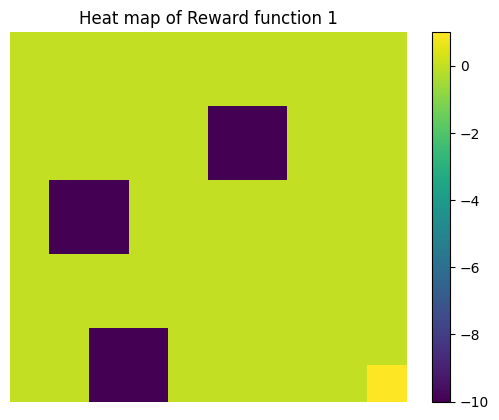

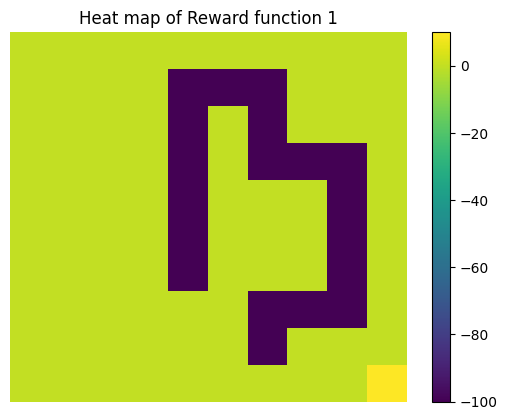

In [ ]:
## For visualization generating the heat map of the ground truth reward

plt.pcolor(np.flipud(f1))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 1')
plt.show()

plt.pcolor(np.flipud(f2))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 1')
plt.show()

In [ ]:
## Implementing the algorithm for computing the optimal value function for each state
## The algorithm takes as input the MDP and returns an array of optimal values,
## where i^th value in the array corresponds to the optimal value of the i^th state.

def optimal_value(n_states, n_actions, transition_probabilities, reward,
                  discount, threshold=1e-2):
    """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """

    # initialization
    v = np.zeros(n_states)

    # Estimation
    delta = 1 + threshold
    count = 0
    steps = np.linspace(1, 21, 5)
    # v_steps = [[0] * n_states for _ in range(5)]
    v_steps = []
    while delta > threshold:
        delta = 0
        count += 1
        # loop states
        for state in range(n_states):
          
            x,y = (state % np.sqrt(n_states), state // np.sqrt(n_states))
            v_tmp = v[state]
            
            trans_prob_tmp = np.zeros(4)
            # loop actions
            for action in range(n_actions):
              # loop next states
              for next_state in range(n_states):
                trans_prob_tmp[action] += transition_probabilities[state, action, next_state] * \
                 (reward[next_state] + discount * v[next_state])
            v[state] = np.max(trans_prob_tmp)
            delta = np.max([delta,np.abs(v_tmp - v[state])])
        
        if count in steps:
          v_steps.append(v.copy())
        # end for
    # end while

    return v, v_steps

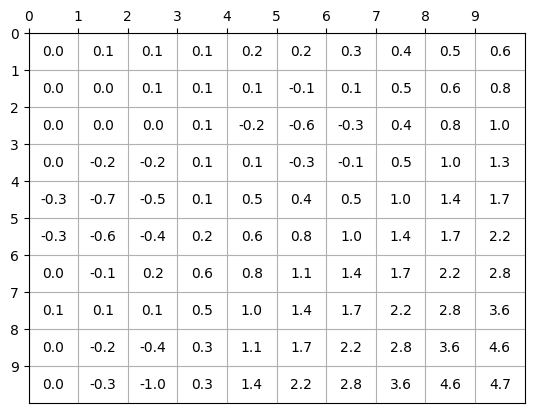

Step: 1.0


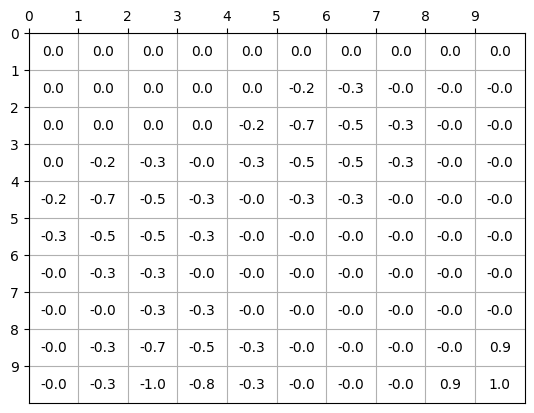

Step: 6.0


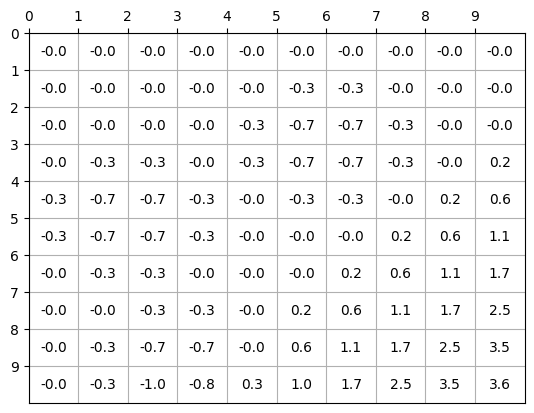

Step: 11.0


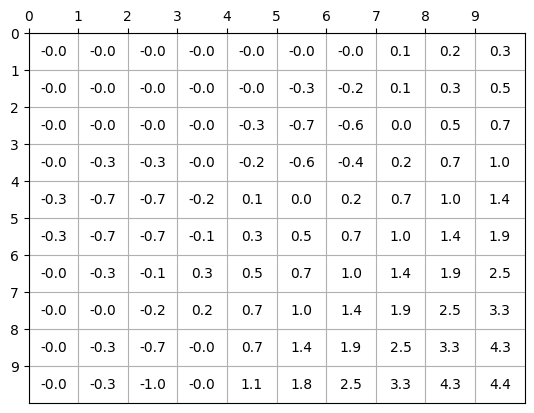

Step: 16.0


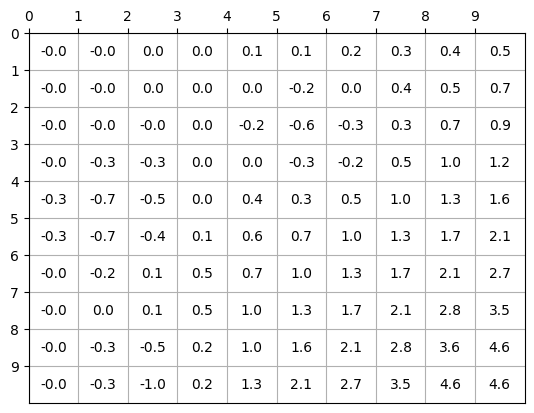

Step: 21.0


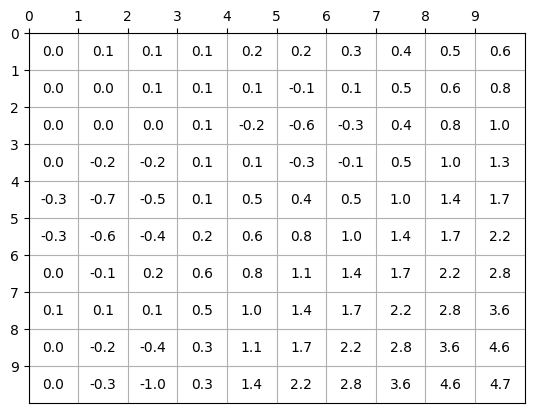

In [ ]:
## Plotting the optimal values of each state in the grid

# Generating the array of rewards to be passed onto the optimal value algorithm
steps = np.linspace(1, 21, 5)

reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i)
    
# Computing the optimal value of each state

v, v_steps = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 1)

mat_steps = [np.zeros((grid_size, grid_size)) for _ in range(5)]

for j,step in enumerate(v_steps):
    for i in range(gw.n_states):
        mat_steps[j][int(i%grid_size)][int(i/grid_size)] = round(step[i], 1)

plot_matrix(value_matrix)
for step in range(len(steps)):
    print("Step: " + str(steps[step]))
    plot_matrix(mat_steps[step])

Question (3)

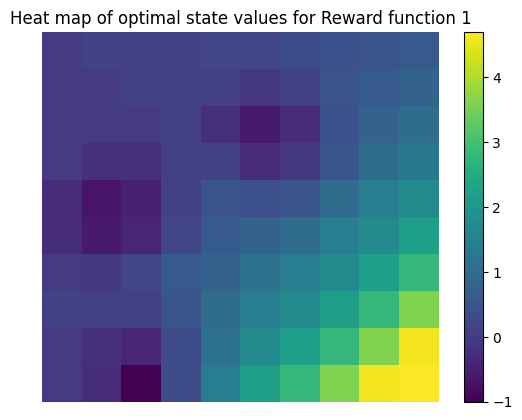

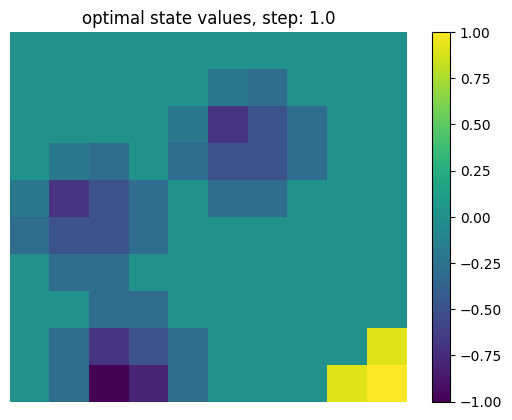

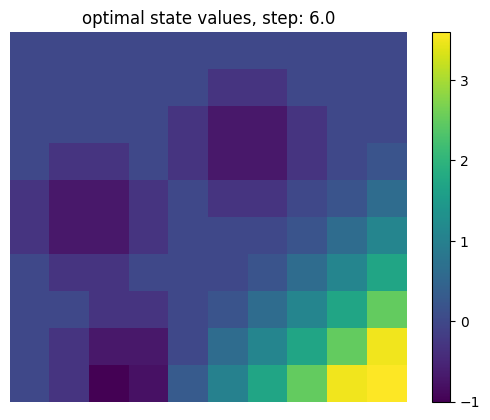

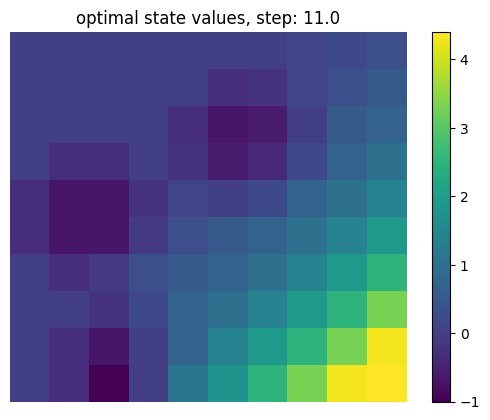

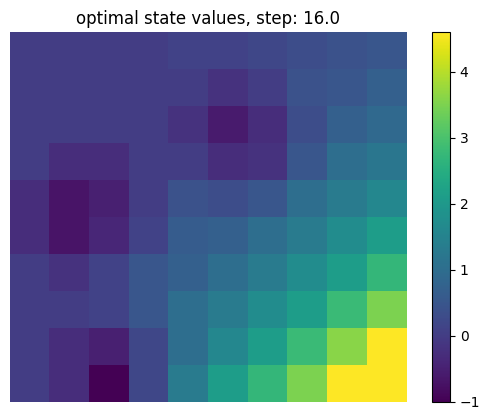

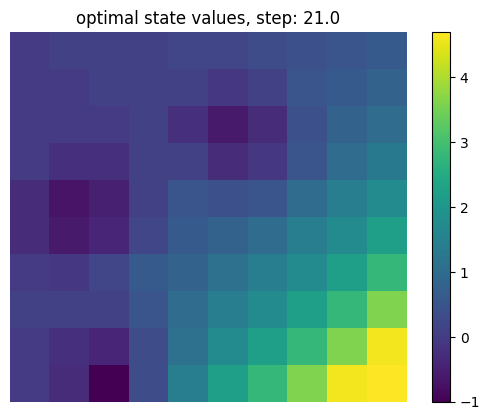

In [ ]:
## For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 1')
plt.show()

for j,step in enumerate(mat_steps):
    plt.pcolor(np.flipud(step))
    plt.colorbar()
    plt.axis('off')
    plt.title('optimal state values, step: ' + str(steps[j]))
    plt.show()

Question (4):

The values are higher for areas that are far from the penalties

Question (5):

In [ ]:
## Implementing the function for computing the optimal policy.
## The function takes as input the MDP and outputs a
## deterministic policy, which is an array of actions.
## The i^th entry in the array corresponds to the
## optimal action to take at the i^th state.

def find_policy(n_states, n_actions, transition_probabilities, reward, discount,
                threshold=1e-2, v=None, stochastic=False):
    """
    Find the optimal value function.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probabilities: Function taking (state, action, state) to
        transition probabilities.
    reward: Vector of rewards for each state.
    discount: MDP discount factor. float.
    threshold: Convergence threshold, default 1e-2. float.
    -> Array of values for each state
    """

    # initialization
    if(v==None):
        v, _ = optimal_value(n_states, n_actions, transition_probabilities, reward, discount)

    # Computation:
    ret_val = np.zeros(n_states)
    for state in range(n_states):
        x,y = (state % np.sqrt(n_states), state // np.sqrt(n_states))
        trans_prob_tmp = np.zeros(n_actions)
        # loop actions
        for action in range(n_actions):
            # loop next states
            for next_state in range(n_states):
                trans_prob_tmp[action] += transition_probabilities[state, action, next_state] * \
                 (gw.reward(next_state) + discount * v[next_state])
        ret_val[state] = np.argmax(trans_prob_tmp)
    
    return ret_val

In [ ]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[i][j]
            arrow = ''
            if(c == 0):
                arrow = u'↓'
            elif(c == 1):
                arrow = u'→'
            elif(c == 2):
                arrow = u'↑'
            else:
                arrow = u'←'
            
            ax.text(j + 0.5, i + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()

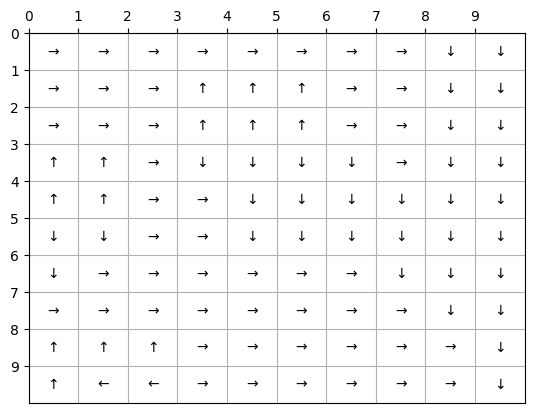

In [ ]:
## Plotting the optimal actions for each state in the grid

# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)

Question(6)

In [ ]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.1
discount = 0.8
reward_func = 2

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount, reward_func)

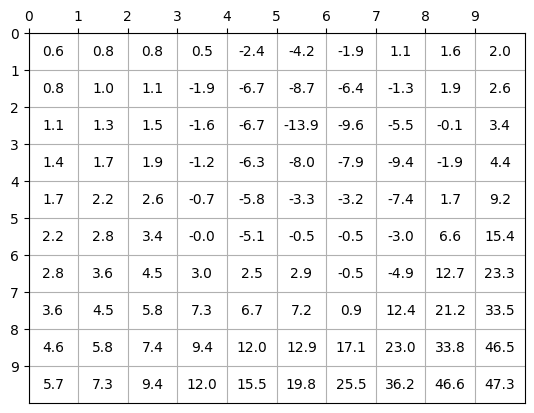

In [ ]:
## Plotting the optimal values of each state in the grid

# Generating the array of rewards to be passed onto the optimal value algorithm
steps = np.linspace(1, 21, 5)

reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i)
    
# Computing the optimal value of each state

v, v_steps = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount)

# Plotting

value_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    value_matrix[int(i%grid_size)][int(i/grid_size)] = round(v[i], 1)

plot_matrix(value_matrix)

Question(7)

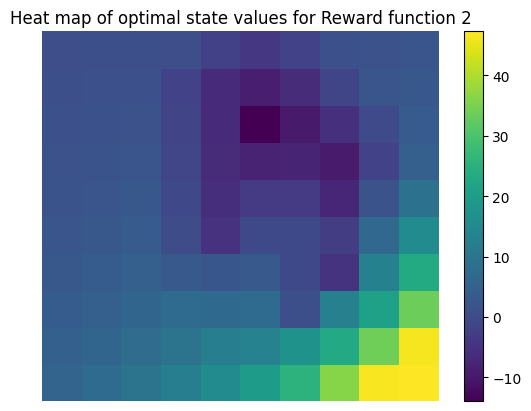

In [ ]:
## For visualization generating the heat map of the optimal state values

plt.pcolor(np.flipud(value_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of optimal state values for Reward function 2')
plt.show()

Question(8)

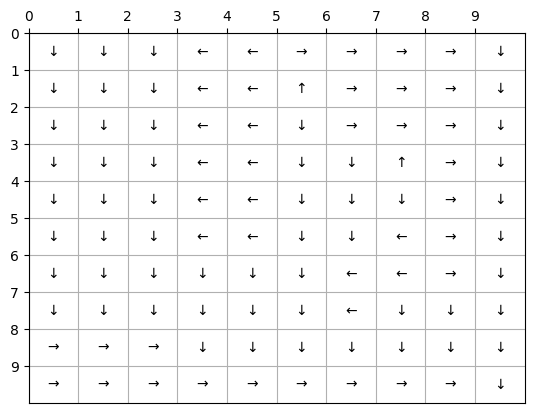

In [ ]:
## Plotting the optimal actions for each state in the grid

# Finding the array of optimal policy

optimal_policy = find_policy(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    

# Plotting
plot_arrow(action_matrix)

Question(9)

In [ ]:
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.6
discount = 0.8
reward_func = 2

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount, reward_func)

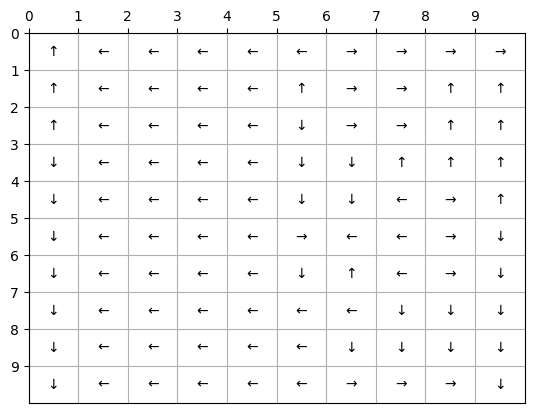

In [ ]:
optimal_policy = find_policy(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount, stochastic=False)

# Generating the matrix containing the optimal actions

action_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    action_matrix[int(i%grid_size)][int(i/grid_size)] = optimal_policy[i]
    
# Plotting
plot_arrow(action_matrix)

------- Part 2 --- IRL ------

Question (11)

In [ ]:

## IRL algorithm
## LP formulation

from cvxopt import matrix, solvers
def irl(n_states, n_actions, transition_probability, policy, discount, Rmax,
        l1):
    """
    Find a reward function with inverse RL as described in Ng & Russell, 2000.

    n_states: Number of states. int.
    n_actions: Number of actions. int.
    transition_probability: NumPy array mapping (state_i, action, state_k) to
        the probability of transitioning from state_i to state_k under action.
        Shape (N, A, N).
    policy: Vector mapping state ints to action ints. Shape (N,).
    discount: Discount factor. float.
    Rmax: Maximum reward. float.
    l1: l1 regularisation. float.
    -> Reward vector
    """

    A = set(range(n_actions))  # Set of actions to help manage reordering
                               # actions.
    # The transition policy convention is different here to the rest of the code
    # for legacy reasons; here, we reorder axes to fix this. We expect the
    # new probabilities to be of the shape (A, N, N).
    transition_probability = np.transpose(transition_probability, (1, 0, 2))

    def T(a, s):
        """
        Shorthand for a dot product used a lot in the LP formulation.
        """

        return np.dot(transition_probability[a, s, :], R)

    # This entire function just computes the block matrices used for the LP
    # formulation of IRL.

    # Minimize c . x.
    c = np.hstack((np.zeros(n_states), np.ones(n_states), l1 * np.ones(n_states)))
    c = matrix(c)

    # Subject to Dx <= b.
    D = np.zeros((2 * n_states * n_actions + n_states, 3 * n_states))
    b = np.zeros(2 * n_states * n_actions + n_states)

    for s in range(n_states):
        a_opt = np.argmax(policy[s])
        tmp_inv = np.linalg.inv(np.identity(n_states) - discount * transition_probability[:, a_opt, :])
        for a in A:
            D[s + a * n_states, s] = 1
            D[s + a * n_states, n_states + s] = -discount
            D[s + a * n_states, 2 * n_states + s] = -1
            b[s + a * n_states] = 0

            for sp in range(n_states):
                D[s + a * n_states + n_states * n_actions, sp] = -transition_probability[a, s, sp]
                D[s + a * n_states + n_states * n_actions, n_states + sp] = transition_probability[a, s, sp] * discount
                D[s + a * n_states + n_states * n_actions, 2 * n_states + sp] = -transition_probability[a, s, sp]
                b[s + a * n_states + n_states * n_actions] = 0

    for s in range(n_states):
        D[2 * n_states * n_actions + s, s] = -1
        D[2 * n_states * n_actions + s, n_states + s] = 1
        D[2 * n_states * n_actions + s, 2 * n_states + s] = -1
        b[2 * n_states * n_actions + s] = -Rmax


    D = matrix(D)
    b = matrix(b)


    # Solve the LP.
    solvers.options['show_progress'] = False
    sol = solvers.lp(c, D, b)
    x = np.array(sol['x']).flatten()

    # Extract the reward vector.
    R = x[:n_states]

    return R

In [ ]:
# def linear_irl(trans_probs, policy, gamma=0.9, l1=10, r_max=1):
def irl(n_states, n_actions, transition_probability, policy,discount,Rmax,l1):

    # Formulate a linear IRL problem
    A = np.zeros([2 * n_states * (n_actions + 1), 3 * n_states])
    b = np.zeros([2 * n_states * (n_actions + 1)])
    c = np.zeros([3 * n_states])

    for i in range(n_states):
        a_opt = np.argmax(policy[i])
        tmp_inv = np.linalg.inv(np.identity(n_states) - discount * transition_probability[:, a_opt, :])

        cnt = 0
        for a in range(n_actions):
            if a != a_opt:
                A[i * (n_actions - 1) + cnt, :n_states] = - \
                    np.dot(transition_probability[i, a_opt, :] - transition_probability[i, a, :], tmp_inv)
                A[n_states * (n_actions - 1) + i * (n_actions - 1) + cnt, :n_states] = - \
                    np.dot(transition_probability[i, a_opt, :] - transition_probability[i, a, :], tmp_inv)
                A[n_states * (n_actions - 1) + i * (
                        n_actions - 1) + cnt, n_states + i] = 1
                cnt += 1

    for i in range(n_states):
        A[2 * n_states * (n_actions - 1) + i, i] = 1
        b[2 * n_states * (n_actions - 1) + i] = Rmax

    for i in range(n_states):
        A[2 * n_states * (n_actions - 1) + n_states + i, i] = -1
        b[2 * n_states * (n_actions - 1) + n_states + i] = 0

    for i in range(n_states):
        A[2 * n_states * (n_actions - 1) + 2 * n_states + i, i] = 1
        A[2 * n_states * (n_actions - 1) + 2 * n_states + i, 2 * n_states + i] = -1

    for i in range(n_states):
        A[2 * n_states * (n_actions - 1) + 3 * n_states + i, i] = 1
        A[2 * n_states * (n_actions - 1) + 3 * n_states + i, 2 * n_states + i] = -1

    for i in range(n_states):
        c[n_states:2 * n_states] = -1
        c[2 * n_states:] = l1

    solvers.options['show_progress'] = False
    sol = solvers.lp(matrix(c), matrix(A), matrix(b))
    rewards = sol['x'][:n_states]
    
    # norm of rewards
    # min_val = np.min(rewards)
    # max_val = np.max(rewards)
    # rewards = (rewards - min_val) / (max_val - min_val)

    rewards = rewards * Rmax
    return rewards

In [ ]:
def irl(n_states, n_actions, transition_probability, policy, discount, Rmax, l1):
        # actions = [-self.shape[0], -1, self.shape[0], 1]
        actions = range(n_actions)
        LP_matrix = np.zeros(((2 * (n_actions - 1) + 4) * n_states, 3 * n_states))
        row_probe = 0
        row_interval = n_states * (n_actions - 1)
        prob_matrix = np.zeros((n_states, n_states))
        for s in range(n_states):
            best_action = actions[policy.transpose().flatten()]
            possible_next = self.possible_next_state(s)
            for next_state in possible_next:
                prob_matrix[s, next_state] = transition_probability(s, next_state, best_action)
        coeff_matrix = np.linalg.inv(np.identity(n_states) - discount * prob_matrix)
        for s in range(n_states):
            best_action = actions[policy.transpose().flatten()]
            possible_next = self.possible_next_state(s)
            for a in actions:
                if a == best_action:
                    continue
                BA_prob = prob_matrix[s]
                LP_matrix[row_probe, s] = 1
                prob_vector = np.zeros((1, n_states))
                for next_state in possible_next:
                    prob_vector[0, next_state] = transition_probability(s, next_state, a)

                tmp_vector = np.dot((prob_vector - BA_prob), coeff_matrix)
                LP_matrix[row_probe, -n_states:] = tmp_vector
                LP_matrix[row_probe + row_interval, -n_states:] = tmp_vector
                row_probe += 1

        row_probe = 2 * row_interval
        LP_matrix[row_probe:row_probe + n_states, n_states:2 * n_states] = -np.identity(n_states)
        LP_matrix[row_probe:row_probe + n_states, 2 * n_states:] = -np.identity(n_states)
        row_probe += n_states
        LP_matrix[row_probe:row_probe + n_states, n_states:2 * n_states] = -np.identity(n_states)
        LP_matrix[row_probe:row_probe + n_states, 2 * n_states:] = np.identity(n_states)
        row_probe += n_states
        LP_matrix[row_probe:row_probe + n_states, 2 * n_states:] = np.identity(n_states)
        row_probe += n_states
        LP_matrix[row_probe:row_probe + n_states, 2 * n_states:] = -np.identity(n_states)

        c_vector = np.zeros((3 * n_states, 1))
        c_vector[:n_states] = -1
        c_vector[n_states:2 * n_states] = p
        b = np.zeros(((2 * (n_actions - 1) + 4) * n_states, 1))
        b[-2 * n_states:] = R_max

        result = solvers.lp(matrix(c_vector), matrix(LP_matrix), matrix(b))
        recovered_reward = result['x'][-n_states:]
        return np.reshape(recovered_reward,4).transpose()

In [ ]:
def accuracy(exp_pol,ag_pol):
    
    num_states = len(exp_pol)
    count = 0.0
    
    for i in range(num_states):
        if exp_pol[i] == ag_pol[i]:
            count += 1
    
    return np.divide(count,num_states)


def iter_acc(grid_obj,op_pol,op_pol_compare):
    
    n_states = grid_obj.n_states
    n_actions = grid_obj.n_actions
    tr_prob = grid_obj.transition_probability
    disc = grid_obj.discount
    Rmax = 100
    accuracy_array = []
    
    lam_range = np.linspace(0,5,500)
        
    for lam in lam_range:
        print("\r", str(round(100*lam / 5.0,1)) + "% done", end="")
        # Solve IRL to get recovered reward function
        rec_reward = irl(n_states, n_actions, tr_prob, op_pol, disc, Rmax, lam)

        # Compute optimal policy using value iteration
        rec_op_pol = find_policy(grid_obj.n_states, grid_obj.n_actions, grid_obj.transition_probability, rec_reward, grid_obj.discount, stochastic=False)

        # Compute accuracy and store in the array
        acc = accuracy(op_pol_compare, rec_op_pol)
        accuracy_array.append(acc)
    
    best_acc = np.amax(accuracy_array)
    best_lambda = lam_range[np.argmax(accuracy_array)]

    return best_acc, best_lambda, accuracy_array

 100.0% done

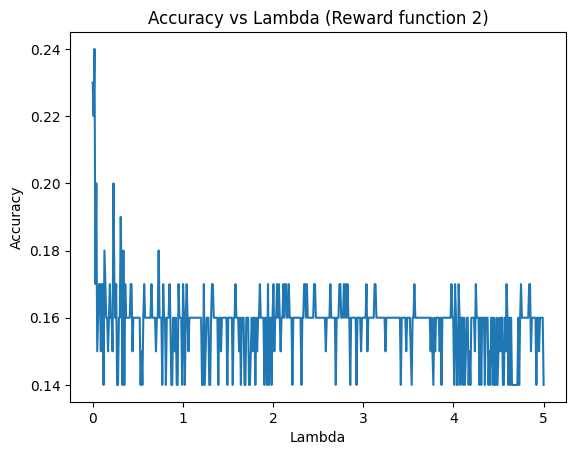

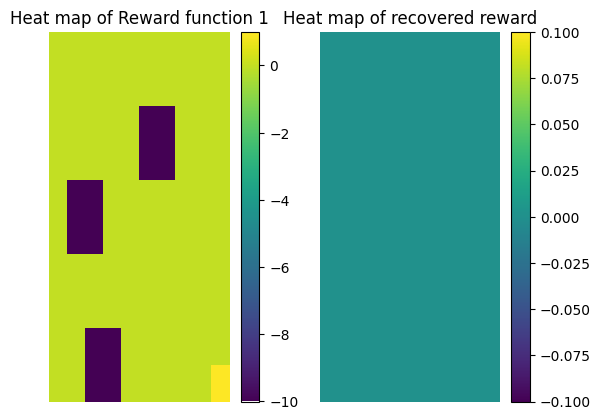

In [ ]:
# Assuming the reward_matrix, expert_policy, and expert_policy_comparison are defined
## Creating the gridworld MDP with the following parameters

grid_size = 10
wind = 0.1
discount = 0.8
reward_func = 1
Rmax = 1

# Make the gridworld and associated data.
gw = Gridworld(grid_size, wind, discount, reward_func)

reward_states = np.zeros(gw.n_states)
for i in range(gw.n_states):
    reward_states[i] = gw.reward(i)
# v, _ = optimal_value(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount)
expert_policy = find_policy(gw.n_states, gw.n_actions, gw.transition_probability, reward_states, gw.discount, stochastic=False)
optimal_policy = np.zeros(expert_policy.shape)

# Compute the best accuracy and best lambda
best_accuracy, best_lambda, accuracy_array = iter_acc(gw, optimal_policy, expert_policy)

# Plot lambda against Accuracy
plt.plot(np.linspace(0, 5, 500), accuracy_array)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Lambda (Reward function 2)')
plt.show()

# Now you can use the best_lambda to compute the final recovered reward
rec_reward = irl(gw.n_states, gw.n_actions, gw.transition_probability, expert_policy,
                        discount, Rmax, best_lambda)

# Plot the heat maps
plt.subplot(1, 2, 1)
plt.pcolor(np.flipud(f1))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 1')


# c = np.reshape(rec_reward_matrix,f1.shape)
rec_reward_matrix = np.zeros((grid_size, grid_size))
for i in range(gw.n_states):
    rec_reward_matrix[int(i%grid_size)][int(i/grid_size)] = round(rec_reward[i], 1)

plt.subplot(1, 2, 2)
plt.pcolor(np.flipud(rec_reward_matrix))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of recovered reward')
plt.show()

In [ ]:
# #Plotting the accuracy

# plt.plot(lam_range,accuracy_array)
# plt.xlabel('Lambda')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Lambda (Reward function 2)')
# plt.show()

In [ ]:

# Rmax = None
# lamda = None


# rec_reward = irl(...)

# # Creating the recovered reward matrix

# rec_reward_matrix = None



# plt.subplot(1, 2, 1)
# plt.pcolor(np.flipud(reward_matrix))
# plt.colorbar()
# plt.axis('off')
# plt.title('Heat map of Reward function 2')


# plt.subplot(1, 2, 2)
# plt.pcolor(np.flipud(rec_reward_matrix))
# plt.colorbar()
# plt.axis('off')
# plt.title('Heat map of recovered reward')
# plt.show()

In [ ]:
# ## Computing the optimal values of each state with extracted reward vector

# opt_val_rec = optimal_value(...)

# # Creating the recovered optimal value matrix

# opt_val_rec_matrix = None
    

# # Generating the heatmap of the optimal values using extracted reward and the groundtruth reward

# plt.subplot(1, 2, 1)
# plt.pcolor(np.flipud(value_matrix))
# plt.colorbar()
# plt.axis('off')
# plt.title('Heat map of optimal values (GR)')


# plt.subplot(1, 2, 2)
# plt.pcolor(np.flipud(opt_val_rec_matrix))
# plt.colorbar()
# plt.axis('off')
# plt.title('Heat map of optimal values (ER)')
# plt.show()

In [ ]:
# ## Plotting the optimal policy of the agent

# optimal_policy_ag = find_policy(...)

# # Generating the matrix containing the optimal actions for the agent

# action_matrix_ag = pass

# # Plotting
# plot_arrow(action_matrix_ag)


SyntaxError: ignored